In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check dataset

In [6]:
DF = pd.read_csv("dataset/metadata_compiled.csv")
DF

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,43.932829,51.6,-0.2,NaN,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,27.702036,-39.0,-68.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
DF.columns

Index(['uuid', 'datetime', 'cough_detected', 'SNR', 'latitude', 'longitude',
       'age', 'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1',
       'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1',
       'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2',
       'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2',
       'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3',
       'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3',
       'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

# Check distribution of features

In [8]:
DF["status"].value_counts()

status
healthy        12479
symptomatic     2590
COVID-19        1155
Name: count, dtype: int64

In [9]:
DF.notna().sum(axis=0)

uuid                     27550
datetime                 27550
cough_detected           27550
SNR                      27550
latitude                 16084
longitude                16084
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  820
cough_type_1               802
dyspnea_1                  820
wheezing_1                 820
stridor_1                  820
choking_1                  820
congestion_1               820
nothing_1                  820
diagnosis_1                802
severity_1                 802
quality_2                  820
cough_type_2               801
dyspnea_2                  820
wheezing_2                 820
stridor_2                  820
choking_2                  820
congestion_2               820
nothing_2                  820
diagnosis_2                802
severity_2                 802
quality_3                  820
cough_ty

Text(0.5, 1.0, 'Number of samples per feature/class')

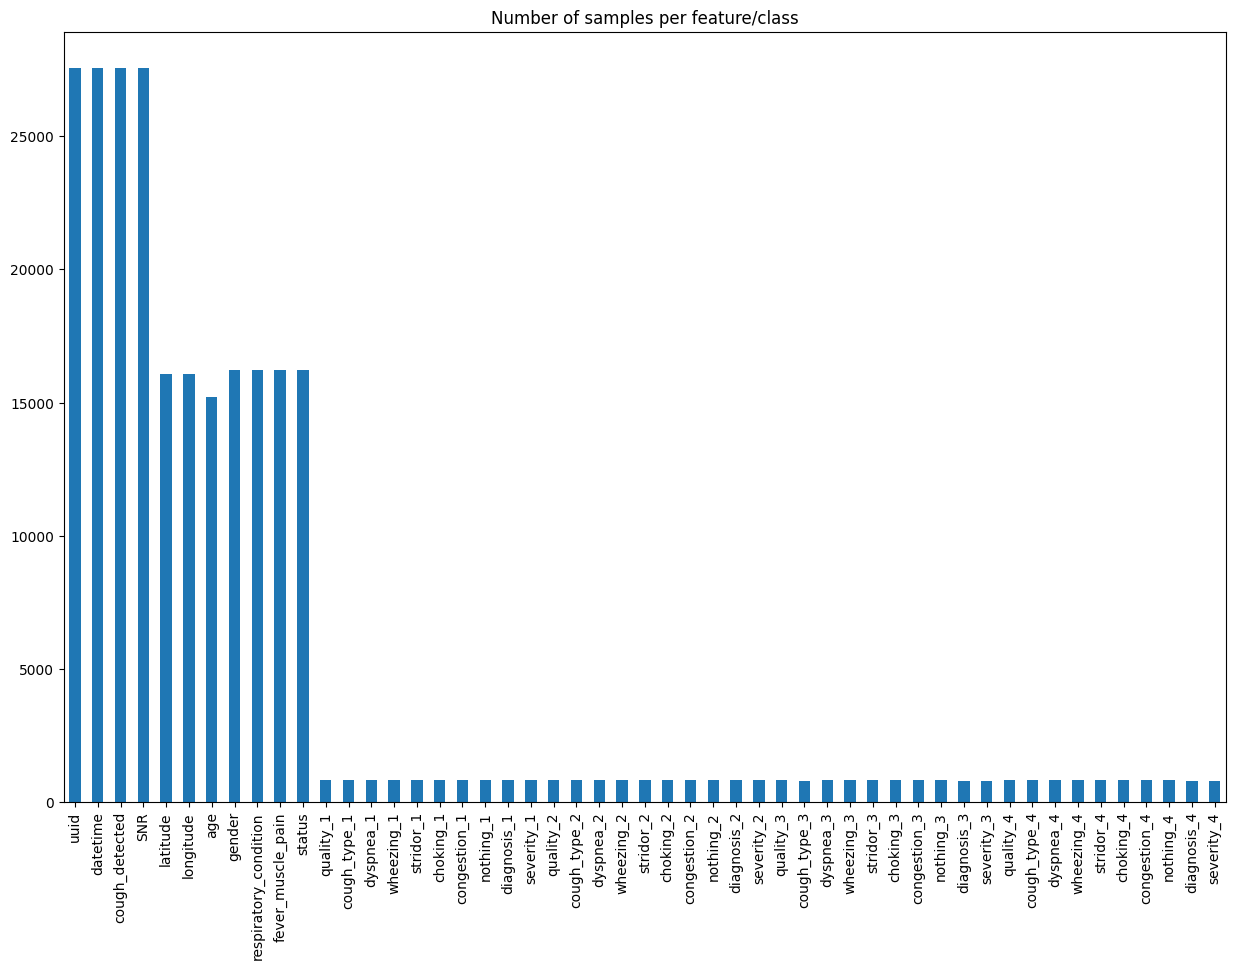

In [10]:
ax = DF.notna().sum(axis=0).plot.bar(figsize=(15,10))
ax.set_title("Number of samples per feature/class")


# Check if some data is missing one of the top 5 features
Here we make sure that if a data has age then it will also have gender, respiratory condition, fever muscle pain and status labels.

In [104]:
labels = ("age", "gender", "respiratory_condition", "fever_muscle_pain", "status")
for i in labels:
    print(f"Samples with {i} label:", DF.notna()[i].sum())

for i in range(5):
    for j in range(i+1,5):
        print(f"Samples with {labels[i]} and {labels[j]} labels:", DF.notna()[[labels[i], labels[j]]].all(axis=1).sum())

Samples with age label: 15218
Samples with gender label: 16224
Samples with respiratory_condition label: 16224
Samples with fever_muscle_pain label: 16224
Samples with status label: 16224
Samples with age and gender labels: 15218
Samples with age and respiratory_condition labels: 15218
Samples with age and fever_muscle_pain labels: 15218
Samples with age and status labels: 15218
Samples with gender and respiratory_condition labels: 16224
Samples with gender and fever_muscle_pain labels: 16224
Samples with gender and status labels: 16224
Samples with respiratory_condition and fever_muscle_pain labels: 16224
Samples with respiratory_condition and status labels: 16224
Samples with fever_muscle_pain and status labels: 16224


In [106]:
labels = ("age", "gender", "respiratory_condition", "fever_muscle_pain", "status")

for i in range(5):
    for j in range(i+1,5):
        temp = list(labels)
        del temp[i]
        del temp[j-1]
        #print(temp)
        print(f"Samples with {temp[0]} and {temp[1]} and {temp[2]} labels:", len(DF[DF.notna()[temp].all(axis=1)]))

for i in range(5):
    temp = list(labels)
    del temp[i]
    #print(temp)
    print(f"Samples with {temp[0]} and {temp[1]} and {temp[2]} and {temp[3]} label:", len(DF[DF.notna()[temp].all(axis=1)]))

print("Samples with all top 5 labels: ", len(DF[DF[list(labels)].notna().all(axis=1)]))

Samples with respiratory_condition and fever_muscle_pain and status labels: 16224
Samples with gender and fever_muscle_pain and status labels: 16224
Samples with gender and respiratory_condition and status labels: 16224
Samples with gender and respiratory_condition and fever_muscle_pain labels: 16224
Samples with age and fever_muscle_pain and status labels: 15218
Samples with age and respiratory_condition and status labels: 15218
Samples with age and respiratory_condition and fever_muscle_pain labels: 15218
Samples with age and gender and status labels: 15218
Samples with age and gender and fever_muscle_pain labels: 15218
Samples with age and gender and respiratory_condition labels: 15218
Samples with gender and respiratory_condition and fever_muscle_pain and status label: 16224
Samples with age and respiratory_condition and fever_muscle_pain and status label: 15218
Samples with age and gender and fever_muscle_pain and status label: 15218
Samples with age and gender and respiratory_con

From the above we can see that if the age label is present then the rest of the top 5 are present

In [11]:
DF2 = DF[DF.notna()["status"]]
DF2.notna().sum(axis=0)


uuid                     16224
datetime                 16224
cough_detected           16224
SNR                      16224
latitude                  9737
longitude                 9737
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  697
cough_type_1               689
dyspnea_1                  697
wheezing_1                 697
stridor_1                  697
choking_1                  697
congestion_1               697
nothing_1                  697
diagnosis_1                689
severity_1                 689
quality_2                  692
cough_type_2               681
dyspnea_2                  692
wheezing_2                 692
stridor_2                  692
choking_2                  692
congestion_2               692
nothing_2                  692
diagnosis_2                682
severity_2                 682
quality_3                  688
cough_ty

In [12]:
DF2 = DF2[DF.notna()["fever_muscle_pain"]]
DF2.notna().sum(axis=0)

/tmp/ipykernel_35773/3445308641.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF2 = DF2[DF.notna()["fever_muscle_pain"]]


uuid                     16224
datetime                 16224
cough_detected           16224
SNR                      16224
latitude                  9737
longitude                 9737
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  697
cough_type_1               689
dyspnea_1                  697
wheezing_1                 697
stridor_1                  697
choking_1                  697
congestion_1               697
nothing_1                  697
diagnosis_1                689
severity_1                 689
quality_2                  692
cough_type_2               681
dyspnea_2                  692
wheezing_2                 692
stridor_2                  692
choking_2                  692
congestion_2               692
nothing_2                  692
diagnosis_2                682
severity_2                 682
quality_3                  688
cough_ty

In [13]:
DF2 = DF2[DF.notna()["respiratory_condition"]]
DF2.notna().sum(axis=0)

/tmp/ipykernel_35773/1536188599.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF2 = DF2[DF.notna()["respiratory_condition"]]


uuid                     16224
datetime                 16224
cough_detected           16224
SNR                      16224
latitude                  9737
longitude                 9737
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  697
cough_type_1               689
dyspnea_1                  697
wheezing_1                 697
stridor_1                  697
choking_1                  697
congestion_1               697
nothing_1                  697
diagnosis_1                689
severity_1                 689
quality_2                  692
cough_type_2               681
dyspnea_2                  692
wheezing_2                 692
stridor_2                  692
choking_2                  692
congestion_2               692
nothing_2                  692
diagnosis_2                682
severity_2                 682
quality_3                  688
cough_ty

In [14]:
DF2 = DF2[DF.notna()["gender"]]
DF2.notna().sum(axis=0)

/tmp/ipykernel_35773/3687336466.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF2 = DF2[DF.notna()["gender"]]


uuid                     16224
datetime                 16224
cough_detected           16224
SNR                      16224
latitude                  9737
longitude                 9737
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  697
cough_type_1               689
dyspnea_1                  697
wheezing_1                 697
stridor_1                  697
choking_1                  697
congestion_1               697
nothing_1                  697
diagnosis_1                689
severity_1                 689
quality_2                  692
cough_type_2               681
dyspnea_2                  692
wheezing_2                 692
stridor_2                  692
choking_2                  692
congestion_2               692
nothing_2                  692
diagnosis_2                682
severity_2                 682
quality_3                  688
cough_ty

In [15]:
DF2 = DF2[DF.notna()["age"]]
DF2.notna().sum(axis=0)

/tmp/ipykernel_35773/1412761741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF2 = DF2[DF.notna()["age"]]


uuid                     15218
datetime                 15218
cough_detected           15218
SNR                      15218
latitude                  9162
longitude                 9162
age                      15218
gender                   15218
respiratory_condition    15218
fever_muscle_pain        15218
status                   15218
quality_1                  649
cough_type_1               644
dyspnea_1                  649
wheezing_1                 649
stridor_1                  649
choking_1                  649
congestion_1               649
nothing_1                  649
diagnosis_1                644
severity_1                 644
quality_2                  647
cough_type_2               640
dyspnea_2                  647
wheezing_2                 647
stridor_2                  647
choking_2                  647
congestion_2               647
nothing_2                  647
diagnosis_2                641
severity_2                 641
quality_3                  639
cough_ty

# Check results of the cough detector from the paper
Here I check the distribution of results from the cough detector, where 1 is 100% certain there is a cough and 0 is 0% certain there is a cough.

<Axes: ylabel='Frequency'>

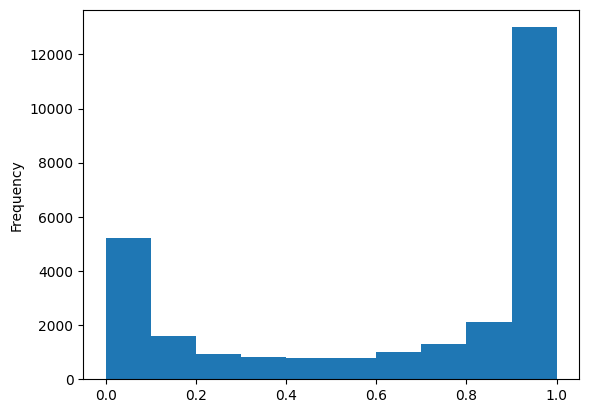

In [16]:
DF["cough_detected"].plot.hist(bins=10)

Here we check for data that has age labels

<Axes: ylabel='Frequency'>

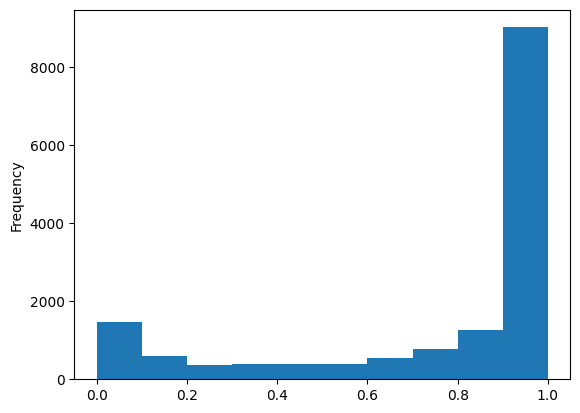

In [17]:
DF[DF.notna()["age"]]["cough_detected"].plot.hist(bins=10)

# Check amount of data with high cough certainty
The paper suggests we use 0.8 as cough detection threshold as it has a precision around 95%

In [23]:
DF2 = DF[DF.notna()["age"]]
DF2 = DF2[DF2["cough_detected"] > 0.8]
DF2.notna().sum(axis=0)

uuid                     10289
datetime                 10289
cough_detected           10289
SNR                      10289
latitude                  6245
longitude                 6245
age                      10289
gender                   10289
respiratory_condition    10289
fever_muscle_pain        10289
status                   10289
quality_1                  644
cough_type_1               644
dyspnea_1                  644
wheezing_1                 644
stridor_1                  644
choking_1                  644
congestion_1               644
nothing_1                  644
diagnosis_1                644
severity_1                 644
quality_2                  641
cough_type_2               640
dyspnea_2                  641
wheezing_2                 641
stridor_2                  641
choking_2                  641
congestion_2               641
nothing_2                  641
diagnosis_2                641
severity_2                 641
quality_3                  627
cough_ty

In [27]:
#DF2 = DF[DF.notna()["age"]]
DF2 = DF[DF["cough_detected"] > 0.8]
DF2.isna().sum(axis=0)

uuid                         0
datetime                     0
cough_detected               0
SNR                          0
latitude                  5998
longitude                 5998
age                       4833
gender                    4305
respiratory_condition     4305
fever_muscle_pain         4305
status                    4305
quality_1                14320
cough_type_1             14320
dyspnea_1                14320
wheezing_1               14320
stridor_1                14320
choking_1                14320
congestion_1             14320
nothing_1                14320
diagnosis_1              14320
severity_1               14320
quality_2                14320
cough_type_2             14321
dyspnea_2                14320
wheezing_2               14320
stridor_2                14320
choking_2                14320
congestion_2             14320
nothing_2                14320
diagnosis_2              14320
severity_2               14320
quality_3                14326
cough_ty

# Check amount of data with expert labels

In [28]:
DF[DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)]

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
12,0029d048-898a-4c70-89c7-0815cdcf7391,2020-07-16T03:01:55.059762+00:00,1.0,9.624196,NaN,NaN,35.0,male,True,False,...,good,dry,False,False,False,False,False,True,upper_infection,mild
14,002db0bd-e57f-4c30-ade0-16640d424eb7,2020-04-13T19:51:11.397697+00:00,1.0,6.781094,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,005b8518-03ba-4bf5-86d2-005541442357,2020-04-14T20:16:53.677536+00:00,1.0,17.428288,45.2,19.7,23.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,006d8d1c-2bf6-46a6-8ef2-1823898a4733,2020-04-22T10:24:21.408615+00:00,1.0,13.284361,NaN,NaN,28.0,male,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,008ba489-31ad-44d8-856b-fcf72369dc46,2020-04-13T23:09:36.585124+00:00,1.0,12.711530,38.1,-122.2,28.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27529,ffbeb867-cdb7-4226-9456-e74c80acf2d9,2020-04-25T01:42:52.162671+00:00,1.0,11.193300,NaN,NaN,30.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27532,ffc99580-678c-46c3-8e3f-c2a19916657d,2020-04-14T20:58:12.567436+00:00,0.0,15.911958,43.3,-3.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27534,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,2020-04-14T05:56:02.587585+00:00,1.0,12.290065,46.5,6.6,25.0,female,False,False,...,ok,dry,False,False,False,False,False,True,COVID-19,mild
27539,ffe0658f-bade-4654-ad79-40a468aabb03,2020-04-14T01:58:32.200245+00:00,1.0,21.960583,41.6,60.9,22.0,male,True,True,...,poor,unknown,False,False,False,False,False,False,NaN,unknown


In [20]:
DF3 = DF[DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)]
DF3.notna().sum(axis=0)

uuid                     2890
datetime                 2890
cough_detected           2890
SNR                      2890
latitude                 1831
longitude                1831
age                      2377
gender                   2545
respiratory_condition    2545
fever_muscle_pain        2545
status                   2545
quality_1                 820
cough_type_1              802
dyspnea_1                 820
wheezing_1                820
stridor_1                 820
choking_1                 820
congestion_1              820
nothing_1                 820
diagnosis_1               802
severity_1                802
quality_2                 820
cough_type_2              801
dyspnea_2                 820
wheezing_2                820
stridor_2                 820
choking_2                 820
congestion_2              820
nothing_2                 820
diagnosis_2               802
severity_2                802
quality_3                 820
cough_type_3              795
dyspnea_3 

Here we check the cough detector score for expert labeled data

<Axes: ylabel='Frequency'>

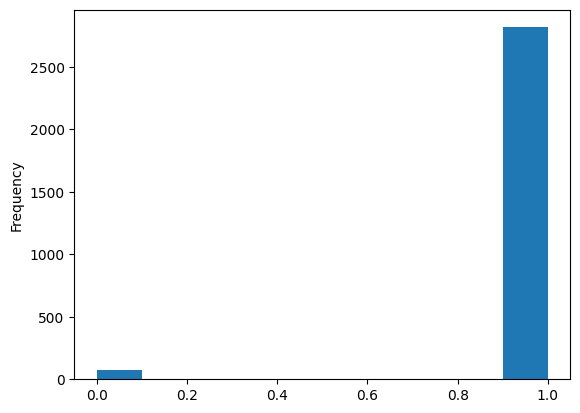

In [21]:
DF[DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)]["cough_detected"].plot.hist(bins=10)

# Count number of samples misclasiffied by cough detector according to experts

In [29]:
DF["quality_1"].value_counts()

quality_1
ok          614
poor        156
good         32
no_cough     18
Name: count, dtype: int64

In [44]:
num_misclassified = 0
for i in range(1,5):
    num_misclassified += DF[DF[f"quality_{i}"] == "no_cough"]["cough_detected"].sum()
print(num_misclassified)

2.0


# See if all self-reported Covid samples were evaluated by experts

In [47]:
DF[DF["status"] == "COVID-19"]

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
7,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,12.713480,13.8,-89.6,NaN,female,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,00357712-dd5a-4c0a-90a4-39f1f4b9d5fd,2020-04-10T12:48:17.554497+00:00,0.0576,0.000000,46.8,6.6,NaN,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,00e0a33c-6561-406e-b543-4c9f07b860f7,2020-04-15T07:01:51.945775+00:00,0.2798,12.695962,NaN,NaN,NaN,other,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,01424527-9c3b-4b6e-96f1-9eea3150819b,2020-10-18T15:51:28.858079+00:00,0.0000,16.047069,48.9,2.5,39.0,female,False,False,...,no_cough,NaN,False,False,False,False,False,False,NaN,NaN
140,015576c8-2b03-4dcb-b251-78a984fe86fe,2020-06-22T00:21:42.091345+00:00,1.0000,12.265701,NaN,NaN,27.0,male,False,False,...,good,unknown,False,False,False,False,False,True,obstructive_disease,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27492,ff68cc55-6fb0-4d41-831f-3642511ad303,2020-05-25T01:33:01.751072+00:00,0.5984,8.772209,-13.0,-38.5,NaN,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27503,ff8363d2-016d-4738-9499-4c62480886fb,2020-07-12T08:22:56.853133+00:00,1.0000,15.357366,NaN,NaN,NaN,female,False,False,...,ok,dry,False,False,False,False,False,True,COVID-19,mild
27519,ffa8bc1f-7ef8-48ef-a951-78a4f2897c0c,2020-11-10T13:38:45.060541+00:00,0.0118,0.000000,47.4,8.5,37.0,male,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27526,ffbca476-8b35-4797-bc8a-b7f0a2f24b55,2020-04-11T18:42:24.065752+00:00,0.7466,13.204350,41.0,28.6,NaN,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1) & DF["status"] == "COVID-19" 
# Above works but below doesn't???
#DF["status"] == "COVID-19" & DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
27545    False
27546    False
27547    False
27548    False
27549    False
Length: 27550, dtype: bool

In [72]:
print("Number of COVID_19 self reportations viewed by experts:\t\t",len(DF[DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1) & DF["status"] == "COVID-19"]))
print("Number of COVID_19 self reportations not viewed by experts:\t",len(DF[DF.isna()[["quality_1", "quality_2", "quality_3", "quality_4"]].all(axis=1) & DF["status"] == "COVID-19"]))

Number of COVID_19 self reportations viewed by experts:		 0
Number of COVID_19 self reportations not viewed by experts:	 0


# Check if expert verified data has the top 5 labels

In [76]:
print("All expert verified data:\t", len(DF[DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)]))
print("Expert data with top 5 labels:\t", len(DF[DF.notna()["age"] & DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)]))

All expert verified data:	 2890
Expert data with top 5 labels:	 2377


In [78]:
DF[DF.isna()["age"] & DF.notna()[["quality_1", "quality_2", "quality_3", "quality_4"]].any(axis=1)].iloc[:,6:11]

,age,gender,respiratory_condition,fever_muscle_pain,status
14,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
27436,NaN,NaN,NaN,NaN,NaN
27503,NaN,female,False,False,COVID-19
27507,NaN,female,False,False,healthy
27518,NaN,NaN,NaN,NaN,NaN


# Playing some samples

In [118]:
import IPython.display as ipd
import librosa

Healthy sample:

In [120]:
x, sr = librosa.load("data/04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78.webm")
ipd.Audio(x, rate=sr)

/tmp/ipykernel_35773/4116431458.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("data/04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [115]:
DF[DF["uuid"] == "04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78"].iloc[0,:]

uuid                     04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78
datetime                     2020-04-12T08:23:24.395508+00:00
cough_detected                                         0.0231
SNR                                                  6.946726
latitude                                                  NaN
longitude                                                 NaN
age                                                      51.0
gender                                                   male
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                                healthy
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_

Symptomatic sample:

In [121]:
x, sr = librosa.load("data/de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf.webm")
ipd.Audio(x, rate=sr)

/tmp/ipykernel_35773/1867883701.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("data/de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [117]:
DF[DF["uuid"] == "de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf"].iloc[0,:]

uuid                     de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf
datetime                     2020-11-28T23:05:05.703552+00:00
cough_detected                                         0.6896
SNR                                                 16.043915
latitude                                                 15.5
longitude                                                32.6
age                                                      26.0
gender                                                   male
respiratory_condition                                    True
fever_muscle_pain                                        True
status                                            symptomatic
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_

Covid positive sample:

In [122]:
x, sr = librosa.load("data/ff8363d2-016d-4738-9499-4c62480886fb.webm")
ipd.Audio(x, rate=sr)

/tmp/ipykernel_35773/299937457.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("data/ff8363d2-016d-4738-9499-4c62480886fb.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [112]:
#DF.iloc[27503,:]
DF[DF["uuid"] == "ff8363d2-016d-4738-9499-4c62480886fb"].iloc[0,:]

uuid                     ff8363d2-016d-4738-9499-4c62480886fb
datetime                     2020-07-12T08:22:56.853133+00:00
cough_detected                                            1.0
SNR                                                 15.357366
latitude                                                  NaN
longitude                                                 NaN
age                                                       NaN
gender                                                 female
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                               COVID-19
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_